In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install scikit-posthocs

In [8]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/PythonPart/datasetWithClusterLabels_attempt_2.csv",index_col=0)
unique = np.unique(df['Cluster label'])
print(unique)
print(df.head())
print(df.shape)

[0 1 2]
        age  HEALS_sum   CCS_sum   PHQ_sum   GAD_sum  EHEALS_sum  \
0  0.648649   0.205128  0.458333  0.074074  0.000000       0.425   
1  0.891892   0.179487  0.500000  0.000000  0.142857       0.625   
2  0.594595   0.051282  0.527778  0.037037  0.190476       0.500   
3  0.027027   0.512821  0.152778  0.185185  0.904762       1.000   
4  0.648649   0.410256  0.305556  0.259259  0.285714       0.725   

   Cluster label  gender_0  gender_1  gender_2  gender_3  income  education  \
0              2       0.0       1.0       0.0       0.0   18000        5.0   
1              2       0.0       0.0       0.0       1.0   23000       18.0   
2              2       1.0       0.0       0.0       0.0   10000        8.0   
3              1       1.0       0.0       0.0       0.0   31000       25.0   
4              0       0.0       0.0       1.0       0.0   40000       13.0   

   marital  
0        1  
1        1  
2        1  
3        5  
4        1  
(150, 14)


In [9]:
cluster1 = df.loc[(df['Cluster label'] == 0)]
cluster2 = df.loc[(df['Cluster label'] == 1)]
cluster3 = df.loc[(df['Cluster label'] == 2)]
# cluster4 = df.loc[(df['Cluster label'] == 3)]

print("Cluster 1 shape: ,", cluster1.shape)
print("Cluster 2 shape: ,", cluster2.shape)
print("Cluster 3 shape: ,", cluster3.shape)
# print("Cluster 4 shape: ,", cluster4.shape)

clusters = [cluster1, cluster2, cluster3] # ,cluster4


Cluster 1 shape: , (50, 14)
Cluster 2 shape: , (50, 14)
Cluster 3 shape: , (50, 14)


**AGE**

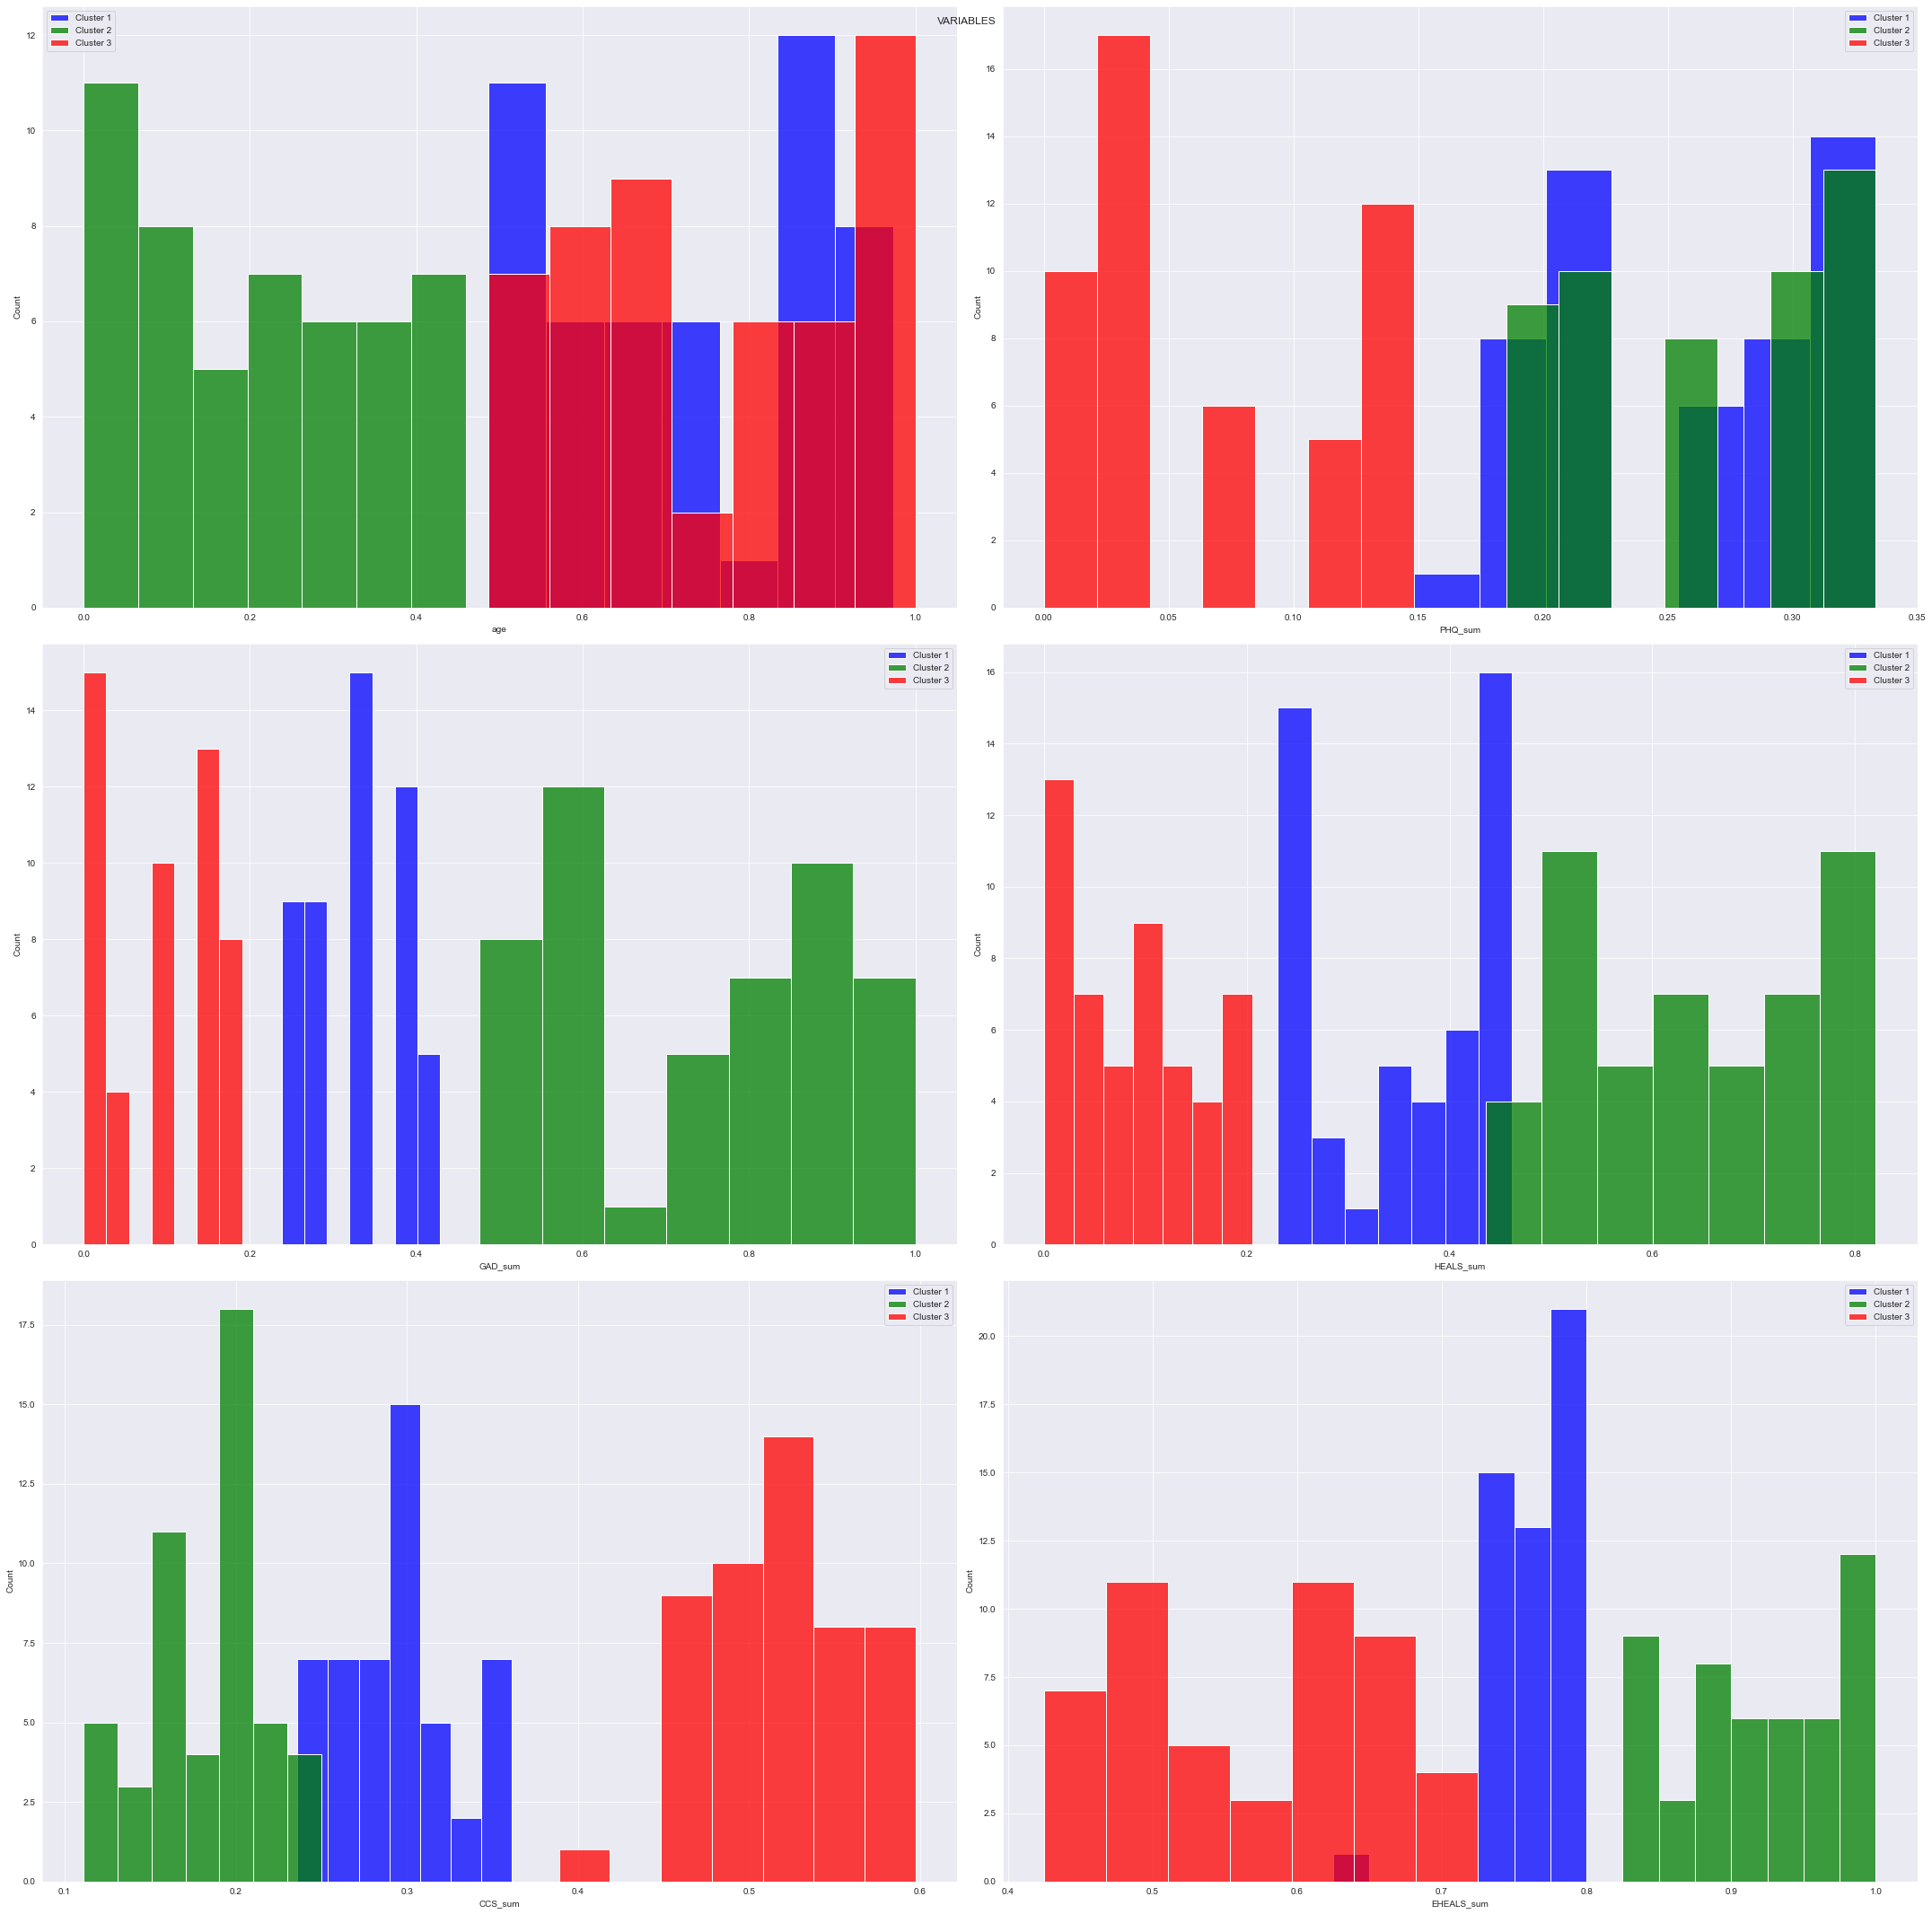

In [10]:
questionnaire_columns = ['age','PHQ_sum', 'GAD_sum', 'HEALS_sum', 'CCS_sum','EHEALS_sum']

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))
axes = axes.flatten()

for i, column_name in enumerate(questionnaire_columns):
    sns.histplot(data=cluster1[column_name],ax=axes[i],color='blue', label='Cluster 1')
    sns.histplot(data=cluster2[column_name],ax=axes[i], color='green', label='Cluster 2')
    sns.histplot(data=cluster3[column_name],ax=axes[i], color='red', label='Cluster 3')
    # sns.histplot(data=cluster4[column_name],ax=axes[i], color='yellow', label='Cluster 4')
    axes[i].legend()
   
plt.suptitle('VARIABLES')
plt.tight_layout()
plt.show()


## Gender distribution in each of the clusters

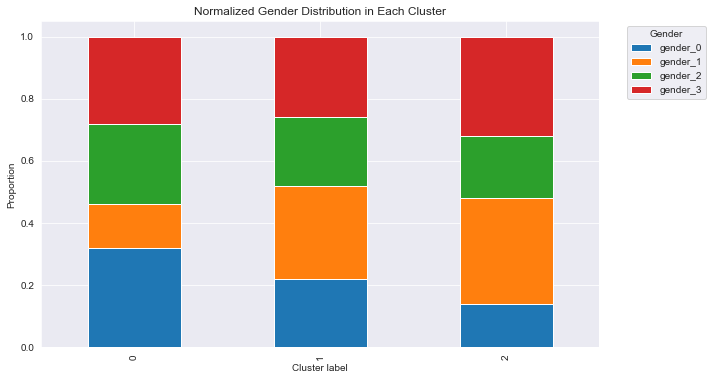

In [11]:
df_clusters = df[['Cluster label', 'gender_0', 'gender_1', 'gender_2', 'gender_3']]

gender_distribution_by_cluster = df_clusters.groupby('Cluster label').sum()

# Get the total count of persons in each cluster
total_persons_by_cluster = df_clusters.groupby('Cluster label')['gender_0'].count()

# Normalize the gender counts by the total count of persons in each cluster
gender_proportion_by_cluster = gender_distribution_by_cluster.div(total_persons_by_cluster, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

gender_proportion_by_cluster.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
plt.xlabel('Cluster label')
plt.ylabel('Proportion')
plt.title('Normalized Gender Distribution in Each Cluster')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()


## Statistical Tests 

### Age 

In [15]:
import scikit_posthocs as sp

## Age 
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['age']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['age']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['age']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)


Kruskal-Wallis Test Statistic: 99.93944321279822
P-value: 1.988042406948483e-22

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.980837e-16  8.792652e-19
Cluster 2  2.980837e-16  1.000000e+00  1.000000e+00
Cluster 3  8.792652e-19  1.000000e+00  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 2
-> Cluster 1 and Cluster 3

No statistical difference is present between: 
-> Cluster 2 and Cluster 3

### PHQ_sum

In [14]:
## PHQ_sum 
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['PHQ_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['PHQ_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['PHQ_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)


Kruskal-Wallis Test Statistic: 100.48023687752354
P-value: 1.5170286817969992e-22

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  1.000000e+00  6.160158e-18
Cluster 2  1.000000e+00  1.000000e+00  2.273128e-17
Cluster 3  6.160158e-18  2.273128e-17  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3

No statistical difference is present between: 
-> Cluster 1 and Cluster 2

### GAD_sum

In [16]:
## GAD_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['GAD_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['GAD_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['GAD_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 133.07468615808912
P-value: 1.2682330313319507e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.407961e-08  2.612211e-30
Cluster 2  2.407961e-08  1.000000e+00  2.407961e-08
Cluster 3  2.612211e-30  2.407961e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 


### EHEALS_sum

In [17]:
## EHEALS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['EHEALS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['EHEALS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['EHEALS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 131.64600653081607
P-value: 2.590794100995198e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  1.750806e-08  5.390719e-30
Cluster 2  1.750806e-08  1.000000e+00  4.760459e-08
Cluster 3  5.390719e-30  4.760459e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

### HEALS_sum

In [18]:
## HEALS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['HEALS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['HEALS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['HEALS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 132.09744904337794
P-value: 2.0672995185036123e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  3.416688e-08  4.277710e-30
Cluster 2  3.416688e-08  1.000000e+00  2.179874e-08
Cluster 3  4.277710e-30  2.179874e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

### CCS_sum

In [19]:
## CCS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['CCS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['CCS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['CCS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 132.3909522842712
P-value: 1.785130558710753e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.941866e-08  3.687117e-30
Cluster 2  2.941866e-08  1.000000e+00  2.349262e-08
Cluster 3  3.687117e-30  2.349262e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

From here -> ignore

In [12]:
cluster1 = df.loc[(df['Cluster label'] == 0)]
cluster2 = df.loc[(df['Cluster label'] == 1)]
cluster3 = df.loc[(df['Cluster label'] == 2)]
# cluster4 = df.loc[(df['Cluster label'] == 3)]

[n_rowsCl1, n_columnsCl1] = cluster1.shape
[n_rowsCl2, n_columnsCl2] = cluster2.shape
[n_rowsCl3, n_columnsCl3] = cluster3.shape
# [n_rowsCl4, n_columnsCl4] = cluster4.shape
obsCluster1 = cluster1.iloc[np.random.randint(0,len(cluster1),size=10),:]
obsCluster2 = cluster2.iloc[np.random.randint(0,len(cluster2),size=10),:]
obsCluster3 = cluster3.iloc[np.random.randint(0,len(cluster3),size=10),:]
# obsCluster4 = cluster4.iloc[np.random.randint(0,len(cluster4),size=10),:]

In [13]:
obsCluster1

,age,HEALS_sum,CCS_sum,PHQ_sum,GAD_sum,EHEALS_sum,Cluster label,gender_0,gender_1,gender_2,gender_3,income,education,marital
117,0.837838,0.230769,0.291667,0.185185,0.285714,0.800,0,0.0,0.0,0.0,1.0,31000,13.0,1
9,0.756757,0.461538,0.305556,0.333333,0.285714,0.725,0,0.0,0.0,1.0,0.0,35000,13.0,1
105,0.729730,0.435897,0.291667,0.333333,0.238095,0.800,0,0.0,0.0,0.0,1.0,33000,18.0,1
104,0.864865,0.461538,0.291667,0.259259,0.428571,0.800,0,0.0,0.0,1.0,0.0,51800,13.0,2
75,0.864865,0.435897,0.263889,0.185185,0.428571,0.725,0,1.0,0.0,0.0,0.0,33000,8.0,1
4,0.648649,0.410256,0.305556,0.259259,0.285714,0.725,0,0.0,0.0,1.0,0.0,40000,13.0,1
38,0.648649,0.410256,0.347222,0.333333,0.333333,0.725,0,0.0,0.0,0.0,1.0,38000,8.0,1
137,0.486486,0.230769,0.263889,0.185185,0.333333,0.725,0,1.0,0.0,0.0,0.0,38000,8.0,1
50,0.486486,0.410256,0.263889,0.259259,0.333333,0.725,0,0.0,0.0,0.0,1.0,27000,18.0,1
113,0.486486,0.461538,0.319444,0.333333,0.285714,0.750,0,1.0,0.0,0.0,0.0,35000,8.0,3


In [16]:
obsCluster2

,age,HEALS_sum,CCS_sum,PHQ_sum,GAD_sum,EHEALS_sum,Cluster label,gender_0,gender_1,gender_2,gender_3,income,education,marital
143,0.432432,0.666667,0.208333,0.185185,0.476190,0.975,1,0.0,1.0,0.0,0.0,36000,22.0,0
33,0.459459,0.717949,0.138889,0.222222,0.857143,0.875,1,0.0,1.0,0.0,0.0,28000,25.0,0
23,0.054054,0.769231,0.166667,0.333333,0.952381,0.875,1,0.0,0.0,1.0,0.0,33000,18.0,0
59,0.351351,0.666667,0.111111,0.296296,0.714286,0.925,1,0.0,1.0,0.0,0.0,29000,22.0,0
130,0.108108,0.538462,0.111111,0.296296,0.523810,0.975,1,0.0,0.0,1.0,0.0,31000,18.0,0
145,0.297297,0.769231,0.222222,0.259259,0.619048,0.950,1,0.0,0.0,1.0,0.0,25000,18.0,0
99,0.027027,0.512821,0.152778,0.333333,1.000000,0.875,1,0.0,1.0,0.0,0.0,36000,22.0,0
35,0.189189,0.820513,0.152778,0.259259,0.619048,0.875,1,1.0,0.0,0.0,0.0,39000,22.0,0
12,0.027027,0.820513,0.208333,0.333333,0.619048,1.000,1,1.0,0.0,0.0,0.0,40000,18.0,0
11,0.189189,0.487179,0.208333,0.296296,0.904762,0.900,1,0.0,0.0,0.0,1.0,36000,25.0,1


In [15]:
obsCluster3

,age,HEALS_sum,CCS_sum,PHQ_sum,GAD_sum,EHEALS_sum,Cluster label,gender_0,gender_1,gender_2,gender_3,income,education,marital
47,1.000000,0.051282,0.486111,0.000000,0.095238,0.625,2,0.0,1.0,0.0,0.0,28000,8.0,2
94,0.837838,0.128205,0.500000,0.148148,0.142857,0.525,2,1.0,0.0,0.0,0.0,25000,5.0,1
100,0.918919,0.051282,0.472222,0.037037,0.190476,0.550,2,0.0,0.0,0.0,1.0,35000,8.0,2
94,0.837838,0.128205,0.500000,0.148148,0.142857,0.525,2,1.0,0.0,0.0,0.0,25000,5.0,1
39,0.648649,0.025641,0.486111,0.000000,0.142857,0.475,2,0.0,0.0,0.0,1.0,13000,8.0,4
84,0.648649,0.025641,0.555556,0.000000,0.095238,0.700,2,0.0,1.0,0.0,0.0,35000,13.0,2
84,0.648649,0.025641,0.555556,0.000000,0.095238,0.700,2,0.0,1.0,0.0,0.0,35000,13.0,2
85,0.945946,0.128205,0.388889,0.000000,0.142857,0.700,2,0.0,0.0,0.0,1.0,17000,13.0,1
148,0.621622,0.076923,0.472222,0.037037,0.095238,0.650,2,0.0,1.0,0.0,0.0,11000,8.0,1
97,0.648649,0.000000,0.541667,0.111111,0.095238,0.625,2,0.0,0.0,1.0,0.0,17000,8.0,1


In [16]:
# obsCluster4

,age,HEALS_sum,CCS_sum,PHQ_sum,GAD_sum,Cluster label,gender_0,gender_1,gender_2,gender_3
93,0.648649,0.28125,0.342857,1.000000,0.285714,3,1.0,0.0,0.0,0.0
88,0.972973,0.56250,0.285714,0.777778,0.380952,3,0.0,1.0,0.0,0.0
122,0.837838,0.53125,0.457143,0.666667,0.380952,3,0.0,0.0,0.0,1.0
56,0.567568,0.53125,0.314286,1.000000,0.333333,3,0.0,1.0,0.0,0.0
132,0.486486,0.43750,0.400000,1.000000,0.238095,3,0.0,0.0,0.0,1.0
139,0.756757,0.31250,0.371429,0.888889,0.428571,3,0.0,0.0,0.0,1.0
103,0.540541,0.31250,0.371429,0.666667,0.380952,3,0.0,0.0,0.0,1.0
53,0.486486,0.31250,0.371429,0.666667,0.380952,3,0.0,0.0,0.0,1.0
31,0.810811,0.34375,0.514286,0.555556,0.333333,3,0.0,0.0,0.0,1.0
54,0.945946,0.28125,0.314286,0.666667,0.238095,3,0.0,0.0,1.0,0.0
